In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
forest=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\neural network\\forestfires.csv")

In [3]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Checking for null values in the data

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### There are no null values in the data

### Distributions of the independant features

<AxesSubplot:xlabel='area', ylabel='Density'>

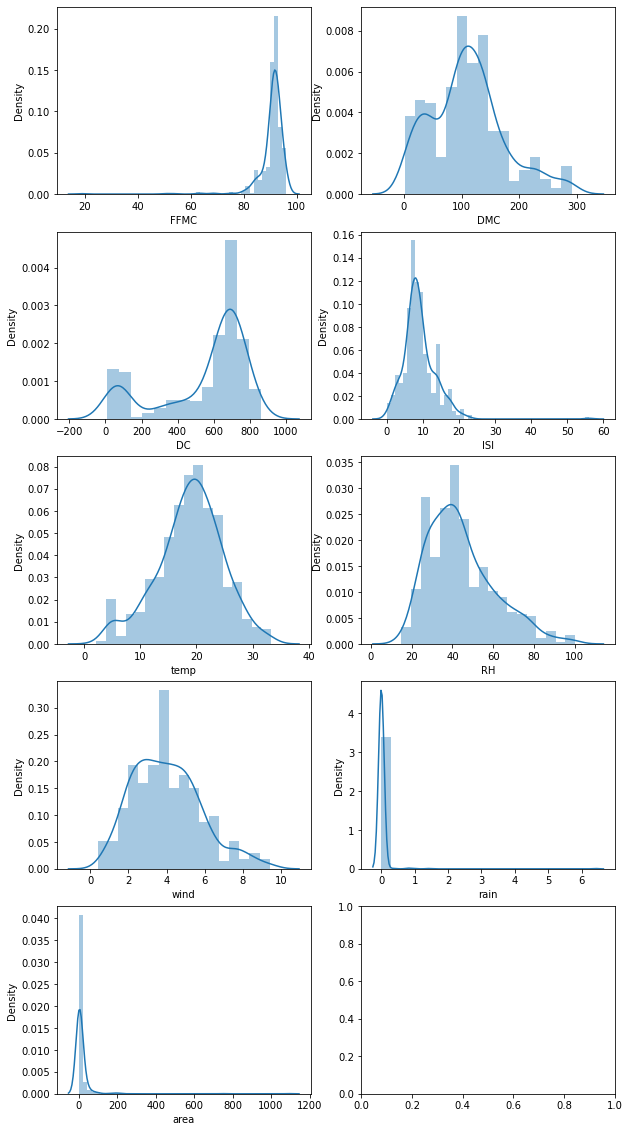

In [5]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest.FFMC,ax=axs[0,0])
sns.distplot(forest.DMC,ax=axs[0,1])
sns.distplot(forest.DC,ax=axs[1,0])
sns.distplot(forest.ISI,ax=axs[1,1])
sns.distplot(forest.temp,ax=axs[2,0])
sns.distplot(forest.RH,ax=axs[2,1])
sns.distplot(forest.wind,ax=axs[3,0])
sns.distplot(forest.rain,ax=axs[3,1])
sns.distplot(forest.area,ax=axs[4,0])

In [6]:
forest.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

### Label encoding the size category column

In [7]:
forest.loc[forest.size_category=='small','size_category']=0
forest.loc[forest.size_category=='large','size_category']=1

In [8]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Dropping month and day columns since they are already present as dummy columns

In [9]:
forest.drop(['month','day'],axis=1,inplace=True)

In [10]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting dependant and independant variables

In [11]:
x=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [13]:
y=y.astype('float')

### Using standard scaler

In [14]:
ss=preprocessing.StandardScaler()

In [15]:
x=ss.fit_transform(x)

### Building model

In [16]:
model=Sequential()
model.add(Dense(28,  activation='relu'))
model.add(Dense(28,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 36ms/step - loss: 0.8488 - accuracy: 0.2948 - val_loss: 0.7373 - val_accuracy: 0.4327
Epoch 2/250
7/7 [==============================] - 0s 6ms/step - loss: 0.7429 - accuracy: 0.4393 - val_loss: 0.6802 - val_accuracy: 0.5965
Epoch 3/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6666 - accuracy: 0.6329 - val_loss: 0.6532 - val_accuracy: 0.6433
Epoch 4/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6188 - accuracy: 0.7254 - val_loss: 0.6445 - val_accuracy: 0.6550
Epoch 5/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5880 - accuracy: 0.7543 - val_loss: 0.6452 - val_accuracy: 0.6725
Epoch 6/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.6489 - val_accuracy: 0.6842
Epoch 7/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.7601 - val_loss: 0.6540 - val_accuracy: 0.6725
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 0.2458 - accuracy: 0.8988 - val_loss: 0.7846 - val_accuracy: 0.7485
Epoch 60/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2395 - accuracy: 0.9133 - val_loss: 0.7877 - val_accuracy: 0.7544
Epoch 61/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2344 - accuracy: 0.9162 - val_loss: 0.7899 - val_accuracy: 0.7544
Epoch 62/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2289 - accuracy: 0.9220 - val_loss: 0.7907 - val_accuracy: 0.7602
Epoch 63/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2240 - accuracy: 0.9220 - val_loss: 0.7979 - val_accuracy: 0.7544
Epoch 64/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2180 - accuracy: 0.9220 - val_loss: 0.8018 - val_accuracy: 0.7602
Epoch 65/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2129 - accuracy: 0.9249 - val_loss: 0.8046 - val_accuracy: 0.7661
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.0634 - accuracy: 0.9913 - val_loss: 1.0998 - val_accuracy: 0.8070
Epoch 118/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0603 - accuracy: 0.9913 - val_loss: 1.1035 - val_accuracy: 0.8187
Epoch 119/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0596 - accuracy: 0.9884 - val_loss: 1.1033 - val_accuracy: 0.8129
Epoch 120/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0589 - accuracy: 0.9913 - val_loss: 1.1103 - val_accuracy: 0.8129
Epoch 121/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0573 - accuracy: 0.9913 - val_loss: 1.1210 - val_accuracy: 0.8129
Epoch 122/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0553 - accuracy: 0.9971 - val_loss: 1.1305 - val_accuracy: 0.8129
Epoch 123/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9942 - val_loss: 1.1354 - val_accuracy: 0.8129
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0213 - accuracy: 0.9971 - val_loss: 1.3838 - val_accuracy: 0.8246
Epoch 176/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 1.3844 - val_accuracy: 0.8246
Epoch 177/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 1.3875 - val_accuracy: 0.8246
Epoch 178/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 1.3951 - val_accuracy: 0.8246
Epoch 179/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 1.4009 - val_accuracy: 0.8246
Epoch 180/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 1.4028 - val_accuracy: 0.8246
Epoch 181/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 1.4075 - val_accuracy: 0.8246
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.6036 - val_accuracy: 0.8304
Epoch 234/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.6071 - val_accuracy: 0.8304
Epoch 235/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.6112 - val_accuracy: 0.8246
Epoch 236/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.6147 - val_accuracy: 0.8246
Epoch 237/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 1.6184 - val_accuracy: 0.8246
Epoch 238/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.6223 - val_accuracy: 0.8246
Epoch 239/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 1.6251 - val_accuracy: 0.8304
Epoch 240/250
7/7 [========

In [19]:
model.evaluate(x,y)

17/17 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.9420


[0.5542942881584167, 0.9419729113578796]

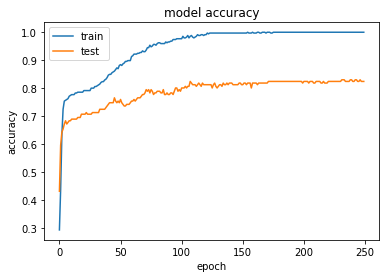

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The model has low validation accuracy

### Building a new model with reduced number of hidden layer nodes

In [21]:
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 30ms/step - loss: 0.6781 - accuracy: 0.5896 - val_loss: 0.6805 - val_accuracy: 0.6374
Epoch 2/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6338 - accuracy: 0.6474 - val_loss: 0.6686 - val_accuracy: 0.6959
Epoch 3/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6040 - accuracy: 0.6994 - val_loss: 0.6644 - val_accuracy: 0.6901
Epoch 4/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5841 - accuracy: 0.7312 - val_loss: 0.6635 - val_accuracy: 0.6725
Epoch 5/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5705 - accuracy: 0.7572 - val_loss: 0.6626 - val_accuracy: 0.6667
Epoch 6/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5576 - accuracy: 0.7601 - val_loss: 0.6613 - val_accuracy: 0.6725
Epoch 7/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5469 - accuracy: 0.7688 - val_loss: 0.6587 - val_accuracy: 0.6784
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 0.2751 - accuracy: 0.8786 - val_loss: 0.6250 - val_accuracy: 0.7485
Epoch 60/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2708 - accuracy: 0.8815 - val_loss: 0.6260 - val_accuracy: 0.7544
Epoch 61/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.8873 - val_loss: 0.6298 - val_accuracy: 0.7602
Epoch 62/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2629 - accuracy: 0.8902 - val_loss: 0.6292 - val_accuracy: 0.7602
Epoch 63/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2585 - accuracy: 0.8902 - val_loss: 0.6298 - val_accuracy: 0.7661
Epoch 64/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2543 - accuracy: 0.8960 - val_loss: 0.6319 - val_accuracy: 0.7661
Epoch 65/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.9017 - val_loss: 0.6344 - val_accuracy: 0.7661
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.0932 - accuracy: 0.9798 - val_loss: 0.9037 - val_accuracy: 0.7661
Epoch 118/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0922 - accuracy: 0.9798 - val_loss: 0.9207 - val_accuracy: 0.7602
Epoch 119/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0901 - accuracy: 0.9798 - val_loss: 0.9245 - val_accuracy: 0.7719
Epoch 120/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0885 - accuracy: 0.9798 - val_loss: 0.9212 - val_accuracy: 0.7778
Epoch 121/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0866 - accuracy: 0.9798 - val_loss: 0.9307 - val_accuracy: 0.7719
Epoch 122/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0853 - accuracy: 0.9798 - val_loss: 0.9385 - val_accuracy: 0.7719
Epoch 123/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0838 - accuracy: 0.9798 - val_loss: 0.9435 - val_accuracy: 0.7719
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.9971 - val_loss: 1.2582 - val_accuracy: 0.7368
Epoch 176/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.9942 - val_loss: 1.2570 - val_accuracy: 0.7368
Epoch 177/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.9942 - val_loss: 1.2676 - val_accuracy: 0.7368
Epoch 178/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9971 - val_loss: 1.2791 - val_accuracy: 0.7368
Epoch 179/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9971 - val_loss: 1.2768 - val_accuracy: 0.7368
Epoch 180/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9942 - val_loss: 1.2806 - val_accuracy: 0.7368
Epoch 181/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0312 - accuracy: 0.9942 - val_loss: 1.2852 - val_accuracy: 0.7368
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 1.4936 - val_accuracy: 0.7602
Epoch 234/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.5011 - val_accuracy: 0.7544
Epoch 235/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.5005 - val_accuracy: 0.7602
Epoch 236/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 1.4910 - val_accuracy: 0.7602
Epoch 237/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 1.4997 - val_accuracy: 0.7602
Epoch 238/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 1.5090 - val_accuracy: 0.7602
Epoch 239/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 1.5221 - val_accuracy: 0.7485
Epoch 240/250
7/7 [========

In [22]:
model2.evaluate(x,y)

17/17 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.9188


[0.5220503807067871, 0.9187620878219604]

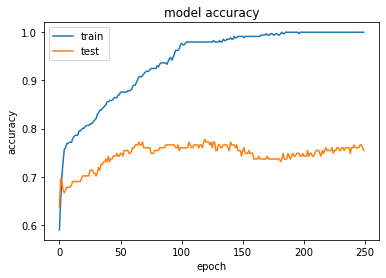

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Validation accuracy didnt improve

In [24]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

### Dropping day dummy columns from the data 

In [25]:
x=forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','size_category'],axis=1)

In [26]:
y=y=forest.iloc[:,-1]

In [27]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthapr,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Building a new model for the new data

In [28]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=y.astype('float')
model4=Sequential()
model4.add(Dense(21,  activation='relu'))
model4.add(Dense(15,  activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model4.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 31ms/step - loss: 0.6464 - accuracy: 0.7110 - val_loss: 0.7009 - val_accuracy: 0.6316
Epoch 2/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6221 - accuracy: 0.7341 - val_loss: 0.6943 - val_accuracy: 0.6550
Epoch 3/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.7399 - val_loss: 0.6894 - val_accuracy: 0.6725
Epoch 4/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5881 - accuracy: 0.7514 - val_loss: 0.6864 - val_accuracy: 0.6608
Epoch 5/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5738 - accuracy: 0.7543 - val_loss: 0.6854 - val_accuracy: 0.6608
Epoch 6/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5630 - accuracy: 0.7543 - val_loss: 0.6858 - val_accuracy: 0.6725
Epoch 7/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5541 - accuracy: 0.7514 - val_loss: 0.6888 - val_accuracy: 0.6725
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.8584 - val_loss: 0.6835 - val_accuracy: 0.7719
Epoch 60/250
7/7 [==============================] - 0s 6ms/step - loss: 0.3046 - accuracy: 0.8584 - val_loss: 0.6797 - val_accuracy: 0.7719
Epoch 61/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.8613 - val_loss: 0.6834 - val_accuracy: 0.7719
Epoch 62/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2974 - accuracy: 0.8613 - val_loss: 0.6826 - val_accuracy: 0.7836
Epoch 63/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.8613 - val_loss: 0.6834 - val_accuracy: 0.7836
Epoch 64/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2880 - accuracy: 0.8613 - val_loss: 0.6886 - val_accuracy: 0.7836
Epoch 65/250
7/7 [==============================] - 0s 6ms/step - loss: 0.2843 - accuracy: 0.8613 - val_loss: 0.6876 - val_accuracy: 0.7836
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.1189 - accuracy: 0.9595 - val_loss: 0.8830 - val_accuracy: 0.8655
Epoch 118/250
7/7 [==============================] - 0s 6ms/step - loss: 0.1180 - accuracy: 0.9595 - val_loss: 0.8876 - val_accuracy: 0.8655
Epoch 119/250
7/7 [==============================] - 0s 6ms/step - loss: 0.1160 - accuracy: 0.9595 - val_loss: 0.8951 - val_accuracy: 0.8713
Epoch 120/250
7/7 [==============================] - 0s 6ms/step - loss: 0.1138 - accuracy: 0.9653 - val_loss: 0.9007 - val_accuracy: 0.8713
Epoch 121/250
7/7 [==============================] - 0s 6ms/step - loss: 0.1114 - accuracy: 0.9653 - val_loss: 0.9077 - val_accuracy: 0.8713
Epoch 122/250
7/7 [==============================] - 0s 6ms/step - loss: 0.1098 - accuracy: 0.9595 - val_loss: 0.9124 - val_accuracy: 0.8713
Epoch 123/250
7/7 [==============================] - 0s 6ms/step - loss: 0.1077 - accuracy: 0.9624 - val_loss: 0.9181 - val_accuracy: 0.8713
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0456 - accuracy: 0.9942 - val_loss: 1.2355 - val_accuracy: 0.9006
Epoch 176/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0445 - accuracy: 0.9942 - val_loss: 1.2418 - val_accuracy: 0.9006
Epoch 177/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 1.2478 - val_accuracy: 0.9006
Epoch 178/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0437 - accuracy: 1.0000 - val_loss: 1.2553 - val_accuracy: 0.9006
Epoch 179/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0429 - accuracy: 0.9971 - val_loss: 1.2597 - val_accuracy: 0.9006
Epoch 180/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0427 - accuracy: 0.9971 - val_loss: 1.2657 - val_accuracy: 0.9006
Epoch 181/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 1.2721 - val_accuracy: 0.9006
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 1.5684 - val_accuracy: 0.9064
Epoch 234/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 1.5744 - val_accuracy: 0.9064
Epoch 235/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 1.5811 - val_accuracy: 0.9064
Epoch 236/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 1.5877 - val_accuracy: 0.9064
Epoch 237/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 1.5935 - val_accuracy: 0.9064
Epoch 238/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 1.5991 - val_accuracy: 0.9064
Epoch 239/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.6040 - val_accuracy: 0.9006
Epoch 240/250
7/7 [========

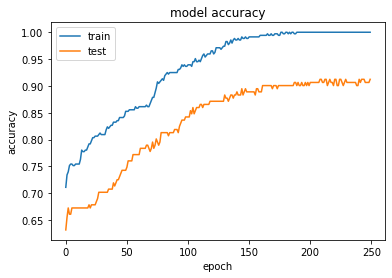

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### From the graph it can be inferred that the validation accuracy improved to 0.91

### So model4 is taken as the final model

In [33]:
model_final=model4